# Myocardial sensitivity analysis results -- Visualization

In [3]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from math import ceil 

from ansys.heart.postprocessor.EPpostprocessor import EPpostprocessor
import matplotlib.pyplot as plt
import re

2024/02/13 17:00:23 - DEBUG - pyheart_global - __init__ - <module> - Loaded logging module as LOG
2024/02/13 17:00:25 - INFO -  - mesher - <module> - Showing Fluent gui: False


## SA on MC endo percentage: epi fixed 0.42 (endo/mid) and change endo percentage

In [68]:
param_doc = r"D:\xuhu\pyansys-heart\downloads\Strocchi2020\01\Biv_SA_MC_15\SA_endo_12Lead.csv"

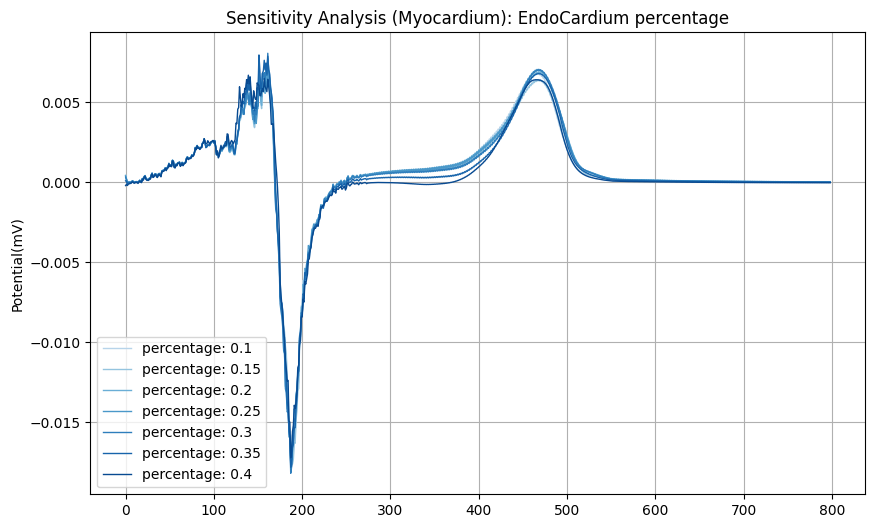

In [69]:
parameters_df = pd.read_csv(param_doc)

colormap = plt.cm.Blues
# color_index = [0.4, 0.8]
color_index = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(10, 6))

for i, row_data in parameters_df.iterrows():
    percent = row_data['endo_percent']
    color = colormap(color_index[i])
    lead_II = np.fromstring(row_data['II'][1:-1], sep=' ')  
    x_values = np.arange(len(lead_II))
    plt.plot(
        x_values,
        lead_II, 
        label="percentage: "+str(row_data['endo_percent']), 
        color=color,
        linewidth=1
    )


plt.legend()

plt.title('Sensitivity Analysis (Myocardium): EndoCardium percentage')
# plt.xlabel('Time(ms)')
plt.ylabel('Potential(mV)')
plt.grid(True)

plt.show()

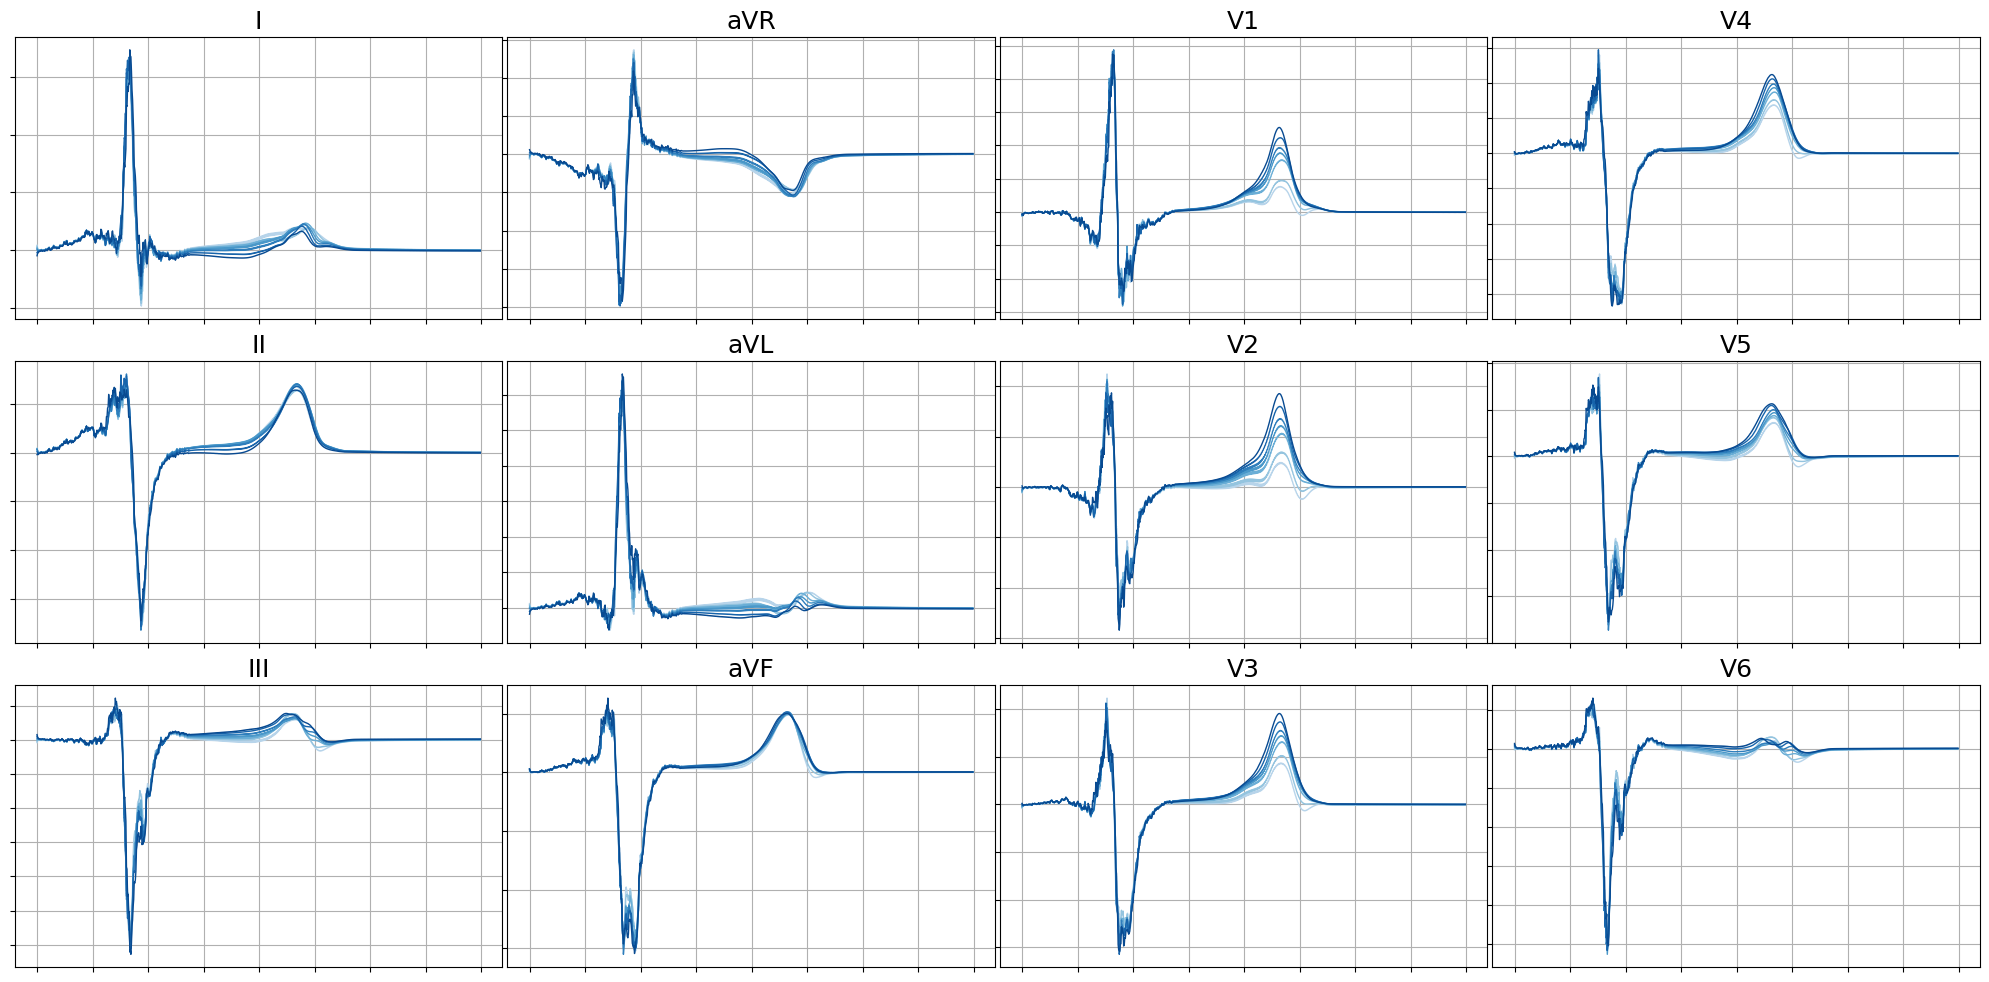

In [71]:
colormap = plt.cm.Blues
# color_index = [0.4, 0.8]
color_index = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# df = pd.DataFrame(ECGs, columns=['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'RA', 'LA', 'RL', 'LL'])


# mean_shape_ecg_csv = r"D:\xuhu\pyansys-heart\downloads\Strocchi2020\01\Biv_PCA\simulation-EP\sa_pca_ecgs\mean_shape.csv"
# mean_shape_ecg = pd.read_csv(mean_shape_ecg_csv)
# plt.plot(
#     mean_shape_ecg['LL']-mean_shape_ecg['RA'], 
#     label='mean_shape', 
#     color='black',
#     linewidth=2.5
# )

parameters_df = pd.read_csv(param_doc)

plt.figure(figsize=(20, 10))
for i, row_data in parameters_df.iterrows():
    percent = row_data['endo_percent']

    leads = {
        'I': row_data['I'],
        'II': row_data['II'],
        'III': row_data['III'],
        'aVR': row_data['aVR'],
        'aVL': row_data['aVL'],
        'aVF': row_data['aVF'],
        'V1': row_data['V1'],
        'V2': row_data['V2'],
        'V3': row_data['V3'],
        'V4': row_data['V4'],
        'V5': row_data['V5'],
        'V6': row_data['V6']
    }
    # print(leads)
    # for j, (lead_name, lead_data) in enumerate(leads.items()):
    #     ax = plt.subplot(3, 4, (j % 3) * 4 + (j // 3) + 1)
    #     color = colormap(color_index[i])
    #     # print(j, lead_name, lead_data)
    #     ax.plot(lead_data, label=f"Percent: {percent}", color=color, linewidth=1.5)
    #     ax.tick_params(labelbottom=False, labelleft=False)  # Hide tick labels
    #     ax.grid(True)  # Add grid to the subplot

    for j, (lead_name, lead_data_str) in enumerate(leads.items()):

        lead_data = np.fromstring(lead_data_str[1:-1], sep=' ')
        
        ax = plt.subplot(3, 4, (j % 3) * 4 + (j // 3) + 1)
        color = colormap(color_index[i % len(color_index)]) 
        ax.plot(lead_data, label=f"Percent: {percent}", color=color, linewidth=1)
        # ax.legend()     
        ax.set_title(lead_name, fontsize=18) 
        ax.tick_params(labelbottom=False, labelleft=False) 
        ax.grid(True)


# plt.legend(fontsize=18, loc='lower right') 
plt.tight_layout()
plt.subplots_adjust(wspace=0.01, hspace=0.15) 
plt.subplots_adjust(top=0.95)
plt.show()

## SA on MC: Epi: endo fixed 0.17 (epi/mid)

In [72]:
param_doc = r"D:\xuhu\pyansys-heart\downloads\Strocchi2020\01\Biv_SA_MC_15\SA_epi_12Lead.csv"

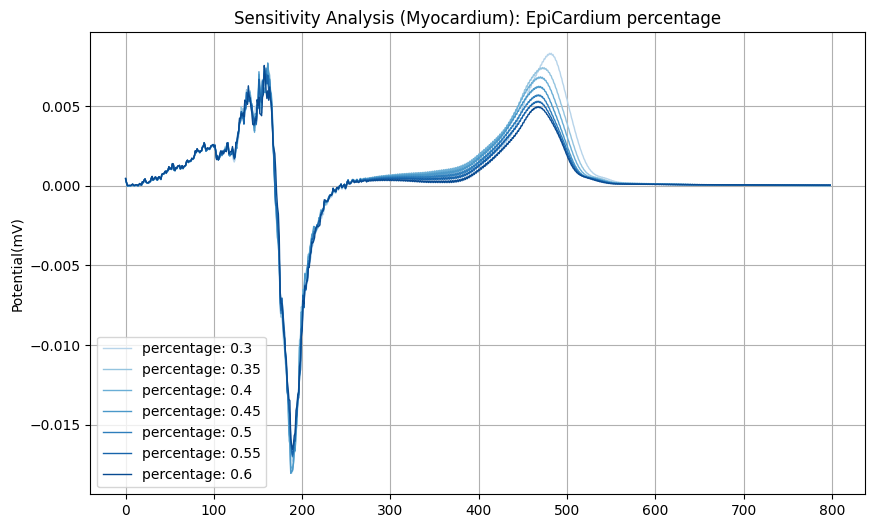

In [65]:
parameters_df = pd.read_csv(param_doc)

colormap = plt.cm.Blues
# color_index = [0.4, 0.8]
color_index = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(10, 6))

for i, row_data in parameters_df.iterrows():
    percent = row_data['epi_percent']
    color = colormap(color_index[i])

    lead_II = np.fromstring(row_data['II'][1:-1], sep=' ')  
    x_values = np.arange(len(lead_II))
    plt.plot(
        x_values,
        lead_II, 
        label="percentage: "+str(row_data['epi_percent']), 
        color=color,
        linewidth=1
    )


plt.legend()

plt.title('Sensitivity Analysis (Myocardium): EpiCardium percentage')
# plt.xlabel('Time(ms)')
plt.ylabel('Potential(mV)')
plt.grid(True)

plt.show()

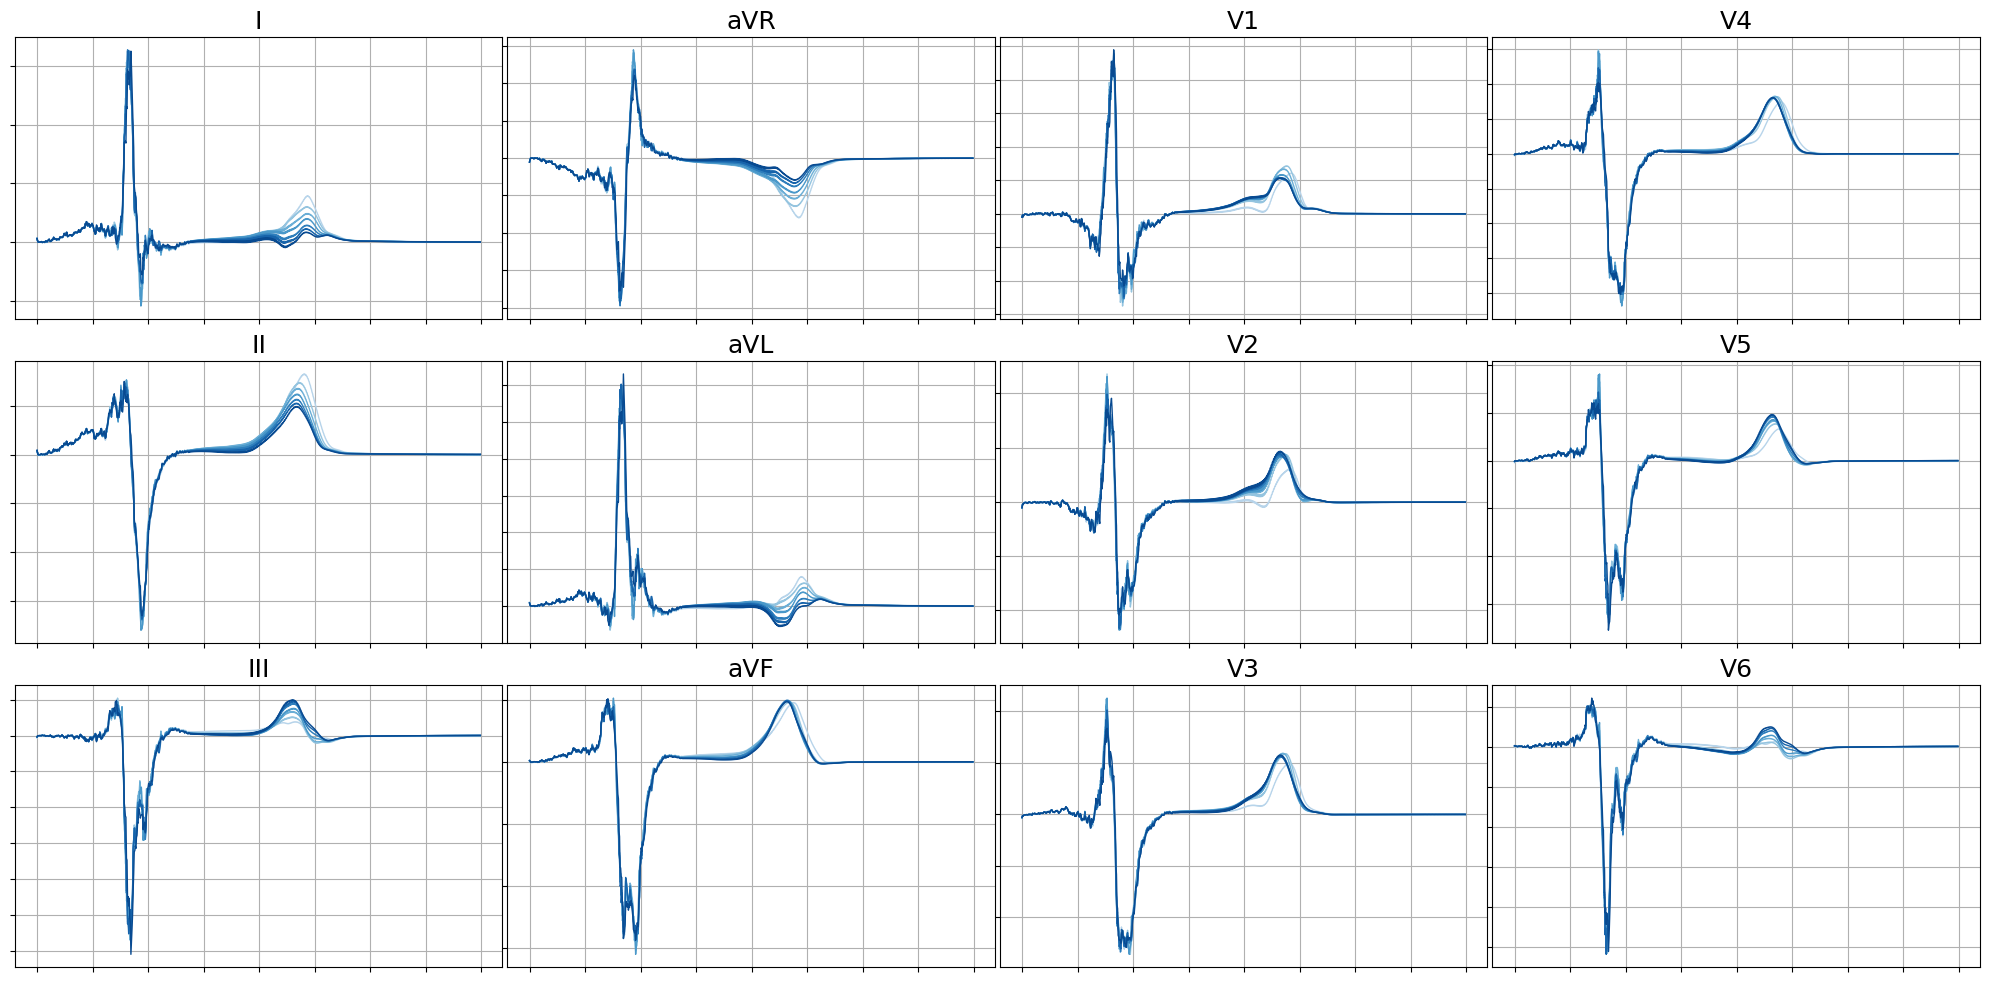

In [73]:
colormap = plt.cm.Blues
# color_index = [0.4, 0.8]
color_index = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# df = pd.DataFrame(ECGs, columns=['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'RA', 'LA', 'RL', 'LL'])

# mean_shape_ecg_csv = r"D:\xuhu\pyansys-heart\downloads\Strocchi2020\01\Biv_PCA\simulation-EP\sa_pca_ecgs\mean_shape.csv"
# mean_shape_ecg = pd.read_csv(mean_shape_ecg_csv)
# plt.plot(
#     mean_shape_ecg['LL']-mean_shape_ecg['RA'], 
#     label='mean_shape', 
#     color='black',
#     linewidth=2.5
# )

parameters_df = pd.read_csv(param_doc)

plt.figure(figsize=(20, 10))
for i, row_data in parameters_df.iterrows():
    percent = row_data['epi_percent']

    leads = {
        'I': row_data['I'],
        'II': row_data['II'],
        'III': row_data['III'],
        'aVR': row_data['aVR'],
        'aVL': row_data['aVL'],
        'aVF': row_data['aVF'],
        'V1': row_data['V1'],
        'V2': row_data['V2'],
        'V3': row_data['V3'],
        'V4': row_data['V4'],
        'V5': row_data['V5'],
        'V6': row_data['V6']
    }
    for j, (lead_name, lead_data_str) in enumerate(leads.items()):

        lead_data = np.fromstring(lead_data_str[1:-1], sep=' ')
        
        ax = plt.subplot(3, 4, (j % 3) * 4 + (j // 3) + 1)
        color = colormap(color_index[i % len(color_index)]) 
        ax.plot(lead_data, label=f"Percent: {percent}", color=color, linewidth=1)
        ax.set_title(lead_name, fontsize=18) 
        ax.tick_params(labelbottom=False, labelleft=False) 
        ax.grid(True)


# plt.legend(fontsize=18, loc='lower right') 
plt.tight_layout()
plt.subplots_adjust(wspace=0.01, hspace=0.15)  
plt.subplots_adjust(top=0.95)
plt.show()

## SA on MC: Endo: mid fixed 0.41 (endo/epi)

In [1]:
param_doc = r"D:\xuhu\pyansys-heart\downloads\Strocchi2020\01\Biv_SA_MC_15\SA_mid_12Lead.csv"

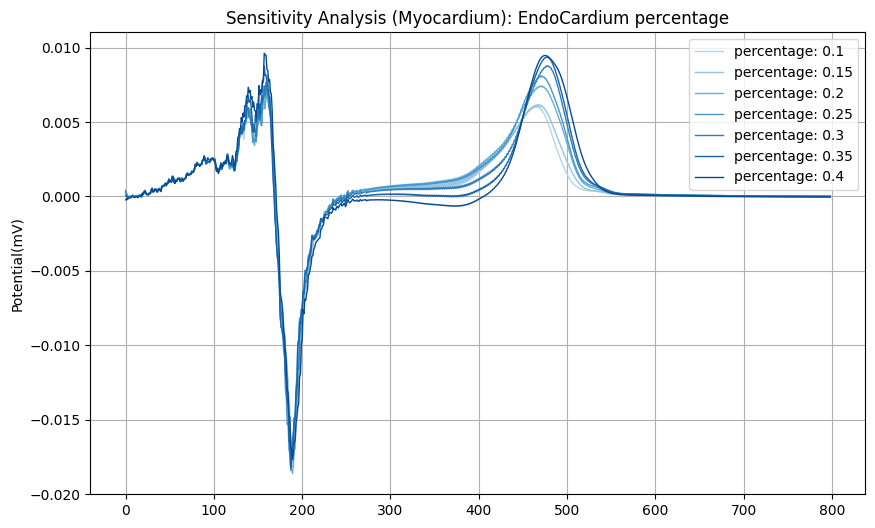

In [6]:
parameters_df = pd.read_csv(param_doc)

colormap = plt.cm.Blues
color_index = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(10, 6))

for i, row_data in parameters_df.iterrows():
    percent = row_data['endo_percent']
    color = colormap(color_index[i])
    lead_II = np.fromstring(row_data['II'][1:-1], sep=' ')  
    x_values = np.arange(len(lead_II))
    plt.plot(
        x_values,
        lead_II, 
        label="percentage: "+str(row_data['endo_percent']), 
        color=color,
        linewidth=1
    )


plt.legend()

plt.title('Sensitivity Analysis (Myocardium): EndoCardium percentage')
# plt.xlabel('Time(ms)')
plt.ylabel('Potential(mV)')
plt.grid(True)

plt.show()

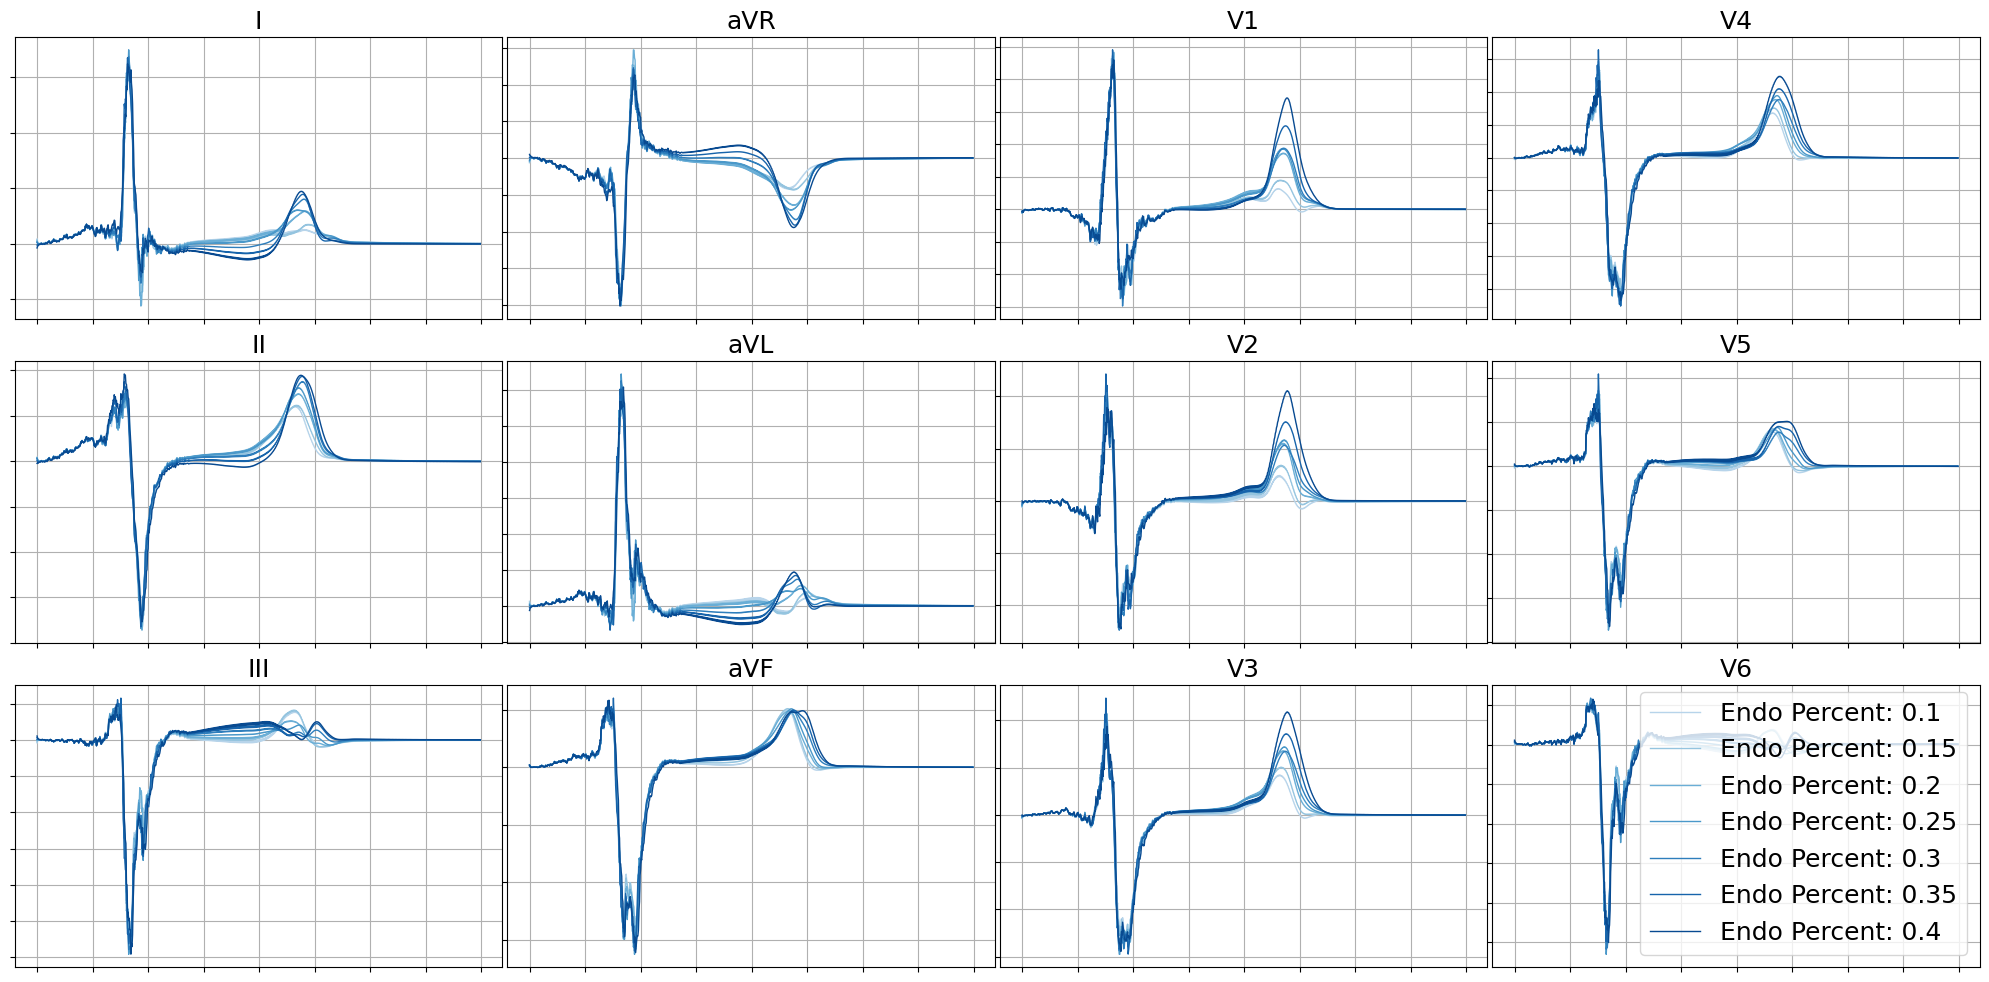

In [8]:
colormap = plt.cm.Blues
color_index = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


parameters_df = pd.read_csv(param_doc)

plt.figure(figsize=(20, 10))
for i, row_data in parameters_df.iterrows():
    percent = row_data['endo_percent']

    leads = {
        'I': row_data['I'],
        'II': row_data['II'],
        'III': row_data['III'],
        'aVR': row_data['aVR'],
        'aVL': row_data['aVL'],
        'aVF': row_data['aVF'],
        'V1': row_data['V1'],
        'V2': row_data['V2'],
        'V3': row_data['V3'],
        'V4': row_data['V4'],
        'V5': row_data['V5'],
        'V6': row_data['V6']
    }

    for j, (lead_name, lead_data_str) in enumerate(leads.items()):

        lead_data = np.fromstring(lead_data_str[1:-1], sep=' ')
        
        ax = plt.subplot(3, 4, (j % 3) * 4 + (j // 3) + 1)
        color = colormap(color_index[i % len(color_index)]) 
        ax.plot(lead_data, label=f"Endo Percent: {percent}", color=color, linewidth=1)
        # ax.legend()     
        ax.set_title(lead_name, fontsize=18)  # Enlarged subtitle
        ax.tick_params(labelbottom=False, labelleft=False) 
        ax.grid(True)


plt.legend(fontsize=18, loc='lower right') 
plt.tight_layout()
plt.subplots_adjust(wspace=0.01, hspace=0.15)
# plt.suptitle('Sensitivity Analysis (MC): endo percentage', fontsize=18)  # Enlarged main title
plt.subplots_adjust(top=0.95)
plt.show()